# Detect Persons From An Image with YOLOv5 Object Detection

---

[Github](https://github.com/eugenesiow/practical-ml/blob/master/notebooks/Remove_Image_Background_DeepLabV3.ipynb) | More Notebooks @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml)

---

Notebook to detect persons from a image and to export clippings of the persons and an image with bounding boxes drawn. It can detect classes other than persons as well.

[Object detection](https://paperswithcode.com/task/object-detection) is the task of detecting instances of objects of a certain class within an image. The state-of-the-art methods can be categorized into two main types: one-stage methods and two stage-methods. Pre-trained YOLOv5 models are used in this one-stage method that prioritizes inference speed.

The [model used](https://pytorch.org/hub/ultralytics_yolov5/) is one of the pre-trained `ultralytics/yolov5` models. It was trained on the COCO train2017 for object detection set, it has [80 classes](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data#1-create-datasetyaml).

The notebook is structured as follows:
* Setting up the Environment
* Getting Data
* Using the Model (Running Inference)

# Setting up the Environment

#### Dependencies and Runtime

If you're running this notebook in Google Colab, all the dependencies are already installed and we don't need the GPU for this particular example. 

If you decide to run this on many (>thousands) images and want the inference to go faster though, you can select `Runtime` > `Change Runtime Type` from the menubar. Ensure that `GPU` is selected as the `Hardware accelerator`.

# Getting Data

#### Getting Foreground Images

* Foreground image #1: A photo of a [baseball team](https://unsplash.com/photos/GudTmd-Q3Cg) lined up by Wade Austin Ellis. From Unsplash.
* Foreground image #2: An anime fanart image of a [gundam pilot](https://danbooru.donmai.us/posts/4549761) by basedheero. From Danbooru.

We'll save these images to our local storage and view a preview of them in our notebook.

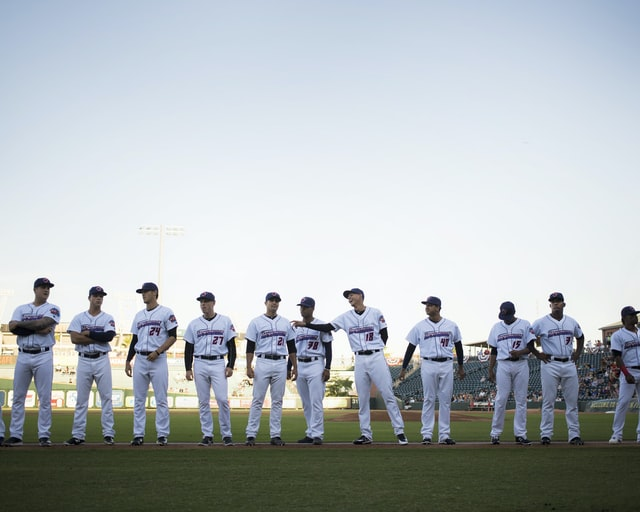

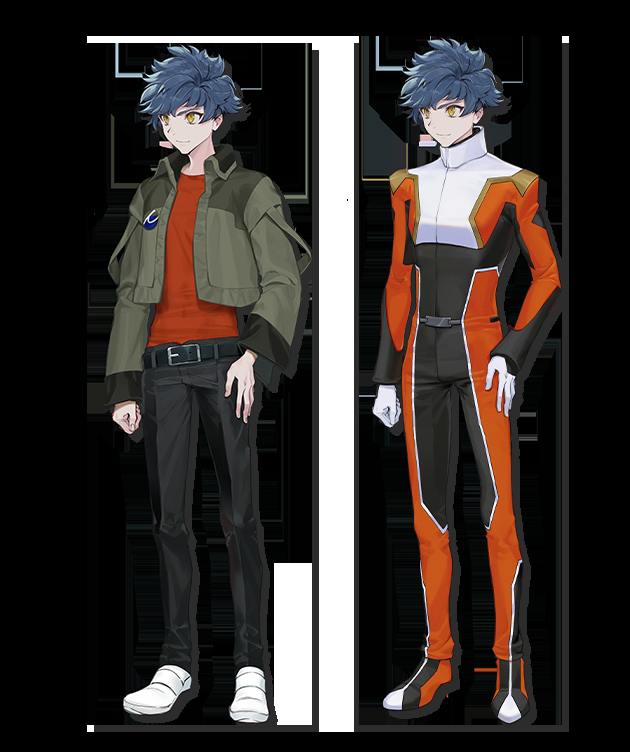

In [5]:
import cv2
from urllib.request import urlretrieve
from google.colab.patches import cv2_imshow

# save the foreground and background to our local storage
urlretrieve('https://images.unsplash.com/photo-1526497127495-3b388dc87620?auto=format&fit=crop&w=640&q=80', '/content/foreground1.jpg')
urlretrieve('https://danbooru.donmai.us/data/original/c0/4e/__tatsumi_hori_gundam_and_2_more__c04e8425ff3685202a67386027ea555d.png', '/content/foreground2.jpg')

# display the images in the notebook
cv2_imshow(cv2.imread('/content/foreground1.jpg'))
cv2_imshow(cv2.imread('/content/foreground2.jpg'))

# Using the Model (Running Inference)

First, we need to install the required dependencies for YOLOv5 by running the code below.

We will also print out the torch version at the end and if we are using CPU or GPU. Both are fine for the inference because YOLOv5 is very fast. If we are running this on thousands of images, we might want to use a GPU. See the `Setting up the Environment` section above for more details.

In [16]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu101 (CPU)


Now we want to load and run the model on our 2 foregrounds. We only need to use the [yolov5s model checkpoints](https://github.com/ultralytics/yolov5/releases/tag/v5.0), which is very [fast](https://github.com/ultralytics/yolov5#pretrained-checkpoints) (just 2ms on a V100) and small (just 14.1mb). If you want higher object detection accuracy, try the larger models, they come in s, m, l and x sizes. 

![YOLOv5 Model Comparison](https://github.com/ultralytics/yolov5/releases/download/v1.0/model_comparison.png)

Specifically we are running the following steps:

* `torch.hub.load()` - Loads the pre-trained model from torchhub. In particular, we specify to use the small model, `yolov5s`.
* create a list called `imgs` with the 2 file paths of the 2 foregrounds in the list.
* `model()` - We run the inference using the model we loaded on the `imgs` list.
* `results.print()` - We print out a summary of the inference run and results from the `results` object which is returned from the previous step.

In [36]:
import torch
import torch
from IPython.display import clear_output

# Load the model from torch.hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Setup the paths of the 2 foregrounds in a list to run the model on 
dir = '/content/'
imgs = [dir + f for f in ('foreground1.jpg', 'foreground2.jpg')]

# Inference, run the model on the 2 foreground images
results = model(imgs, size=640)
clear_output()

# Print out a summary of the inference job, we ran it on 2 images, at what speed and what detections were made
results.print()

image 1/2: 512x640 11 persons, 1 baseball glove
image 2/2: 752x630 2 persons
Speed: 27.7ms pre-process, 498.3ms inference, 1.6ms NMS per image at shape (2, 3, 640, 640)


We can also convert each of the results returned into a pandas DataFrame. We run the `results.pandas().xyxy[0]` to return the pandas DataFrame for the first foreground result (foreground #1). Note that foreground #2 is stored in the second element of the list `.xyxy[1]`.

We see that the pandas DataFrame consists of rows of the 11 persons and 1 baseball glove detected in foreground #1. Each row contains the bounding box (xmin, ymin, xmax and ymax), the confidence of the detection and the class of the detection (0 is person and 35 is baseball glove).

In [39]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,1.820171,277.939270,61.378315,446.184692,0.915716,0,person
1,182.364899,289.592468,237.762878,447.095642,0.912174,0,person
2,62.168884,285.707886,119.877274,445.737854,0.909594,0,person
3,124.440521,282.730286,179.609344,446.281067,0.906918,0,person
4,396.638306,294.687836,465.637573,446.071564,0.905887,0,person
5,528.414978,291.116974,586.654846,446.319061,0.904555,0,person
6,484.672394,300.558014,536.999451,445.440948,0.897158,0,person
7,241.180283,292.066406,296.999481,447.236389,0.893856,0,person
8,288.499298,296.756714,335.706757,444.622498,0.866169,0,person
9,605.190430,305.750885,639.662842,443.529510,0.855186,0,person


Now let's clip out the first row result of foreground #1 and display the detected person.

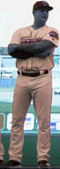

In [40]:
# get the tensor for foreground #1 detection results 
# and convert to an integer numpy array, return the positions x0, y0, x1, y1
x0, y0, x1, y1, _, _ = results.xyxy[0][0].numpy().astype(int) 

# crop/clip the image and show it
cropped_image = results.imgs[0][y0:y1, x0:x1]
cv2_imshow(cropped_image)

If we wanted a view of the bounding boxes, classes and original image all rendered, we can just call `results.render()` and then show the resulting image from the `.imgs` list in results.

We show an example of calling `render()` and then displaying foreground #2 with the rendered bounding boxes and labels.

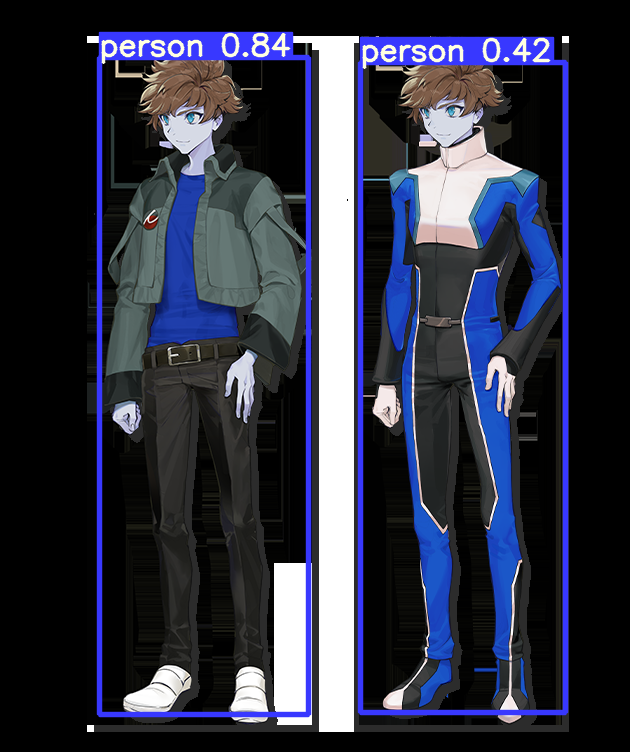

In [41]:
results.render()
cv2_imshow(results.imgs[1])

We can save the rendered image to disk using the `imwrite()` function, with the output filepath and the result image array as parameters.

In [58]:
cv2.imwrite('/content/foreground2_results.jpg', results.imgs[1])

True

We can connect to Google Drive with the following code. You can also click the `Files` icon on the left panel and click `Mount Drive` to mount your Google Drive.

The root of your Google Drive will be mounted to `/content/drive/My Drive/`. If you have problems mounting the drive, you can check out this [tutorial](https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

You can move the output files which are saved in the `/content/` directory to the root of your Google Drive.

In [ ]:
import shutil
shutil.move('/content/foreground2_results.jpg', '/content/drive/My Drive/foreground2_results.jpg')

We can also play around with some settings when we run the model inference. For example, we can set the confidence threshold very high (>0.8) to ensure that only detections which we are 90% or more confident of will be shown.

To detect only persons, we can specify only the `0` class in `model.classes`.

In [53]:
model.conf = 0.8  # confidence threshold (0-1)
model.iou = 0.45  # NMS IoU threshold (0-1)
model.classes = [0]  # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs

results = model(imgs, size=640)
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,190.238281,293.952881,234.340271,441.770935,0.896864,0,person
1,7.301115,284.443268,55.419891,442.663605,0.895121,0,person
2,128.814041,289.282654,176.131577,441.507507,0.891813,0,person
3,339.701233,294.941650,396.082520,444.175171,0.891018,0,person
4,70.443848,291.094604,115.587753,441.149353,0.873643,0,person
5,414.420044,298.033173,459.185974,443.501434,0.867421,0,person
6,536.289062,301.193542,582.555664,443.481262,0.862834,0,person
7,244.774094,296.520996,287.911896,440.504333,0.845676,0,person
8,487.824188,300.951233,529.165833,441.960266,0.822632,0,person


More Notebooks @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml) and do star or drop us some feedback on how to improve the notebooks on the [Github repo](https://github.com/eugenesiow/practical-ml/).